In [21]:
# import modules
import pandas as pd
from siuba import *
import plotnine as p9
import datetime as dt

In [2]:
# read in data
df_horror = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/2e9bd5a67e09b14d01f616b00f7f7e0931515d24/data/2018/2018-10-23/movie_profit.csv") 
print(df_horror.shape)
df_horror.head()

(3401, 9)


,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
0,1,6/22/2007,Evan Almighty,175000000.0,100289690.0,1.741313e+08,Universal,PG,Comedy
1,2,7/28/1995,Waterworld,175000000.0,88246220.0,2.642462e+08,Universal,PG-13,Action
2,3,5/12/2017,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,Warner Bros.,PG-13,Adventure
3,4,12/25/2013,47 Ronin,175000000.0,38362475.0,1.517168e+08,Universal,PG-13,Action
4,5,6/22/2018,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,Universal,PG-13,Action


In [32]:
# create a new column with gross profits to budget ratio using siuba
profitable_movies = (df_horror
    >> filter(_.worldwide_gross > 0)
    >> mutate(gross2budget_ratio = _.worldwide_gross / _.production_budget)
    >> select(_.release_date, _.movie, _.genre, _.gross2budget_ratio)
    >> arrange(-_.gross2budget_ratio)
)
profitable_movies.head(10)


,release_date,movie,genre,gross2budget_ratio
3364,9/25/2009,Paranormal Activity,Horror,431.517853
3338,7/14/1999,The Blair Witch Project,Horror,413.833333
3319,8/13/1942,Bambi,Drama,312.354312
3256,11/21/1976,Rocky,Drama,225.000000
3381,10/17/1978,Halloween,Horror,215.384615
3329,8/11/1973,American Graffiti,Drama,180.180180
3369,6/11/2004,Napoleon Dynamite,Comedy,115.306782
3344,5/9/1980,Friday the 13th,Horror,108.644729
3257,1/6/2012,The Devil Inside,Horror,101.759490
2982,12/15/1939,Gone with the Wind,Drama,100.134665


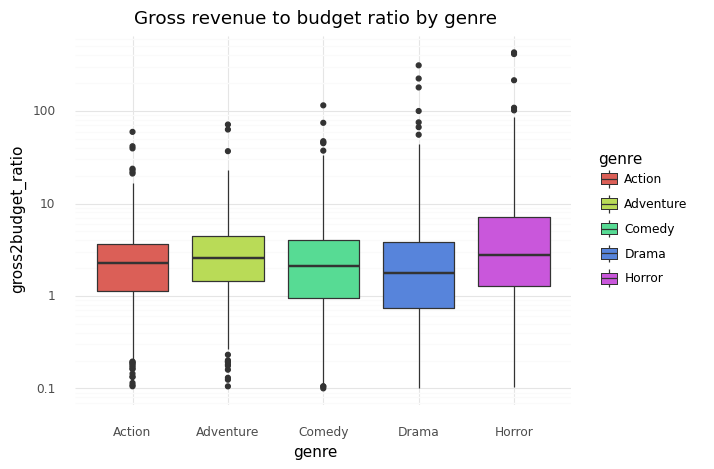

<ggplot: (369341266)>

In [141]:
# plot the distribution of gross profits to budget ratio
from plotnine import *
(profitable_movies
    >> filter(_.gross2budget_ratio > 0.1)
    >> group_by(_.genre)
    >> ggplot(aes(x = "genre", y = "gross2budget_ratio", fill = "genre")) +
        geom_boxplot() +
        scale_y_log10() +
        theme_minimal() + 
        ggtitle("Gross revenue to budget ratio by genre")
)

In [76]:
profitable_movies.columns

Index(['release_date', 'movie', 'genre', 'gross2budget_ratio'], dtype='object')

In [151]:
# top 20 most profitable movies
from siuba.dply.forcats import fct_reorder
from plotnine import *
(profitable_movies
    >> fct_reorder(_.release_date)
)
profitable_movies.head(20)

,release_date,movie,genre,gross2budget_ratio
3364,9/25/2009,Paranormal Activity,Horror,431.517853
3338,7/14/1999,The Blair Witch Project,Horror,413.833333
3319,8/13/1942,Bambi,Drama,312.354312
3256,11/21/1976,Rocky,Drama,225.000000
3381,10/17/1978,Halloween,Horror,215.384615
3329,8/11/1973,American Graffiti,Drama,180.180180
3369,6/11/2004,Napoleon Dynamite,Comedy,115.306782
3344,5/9/1980,Friday the 13th,Horror,108.644729
3257,1/6/2012,The Devil Inside,Horror,101.759490
2982,12/15/1939,Gone with the Wind,Drama,100.134665
